# ABC-XYZ аналіз 


### ABC - аналіз

[x] Порахувати продажі по товарам  
[x] Порахувати вклад кожного товару  
[x] Порахувати суму продажів накопиченим підсумком  
[x] Оприділити групу  

### Динаміка

[х] Оцінити структуру  
[х] порахувати суму продажів за кожен день(місяц, квартал)  
[х] порахувати динаміку   

### XYZ - аналіз 

[х] Рахуємо продажі по дням з розбивкою по товарах  
[х] Фільтруємо тільки ті товари, що продавались декілька днів  
[х] Рахуємо коефіціент варіації  
[х] Оприділяємо групу  

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Загрузимо дані і подивимось на них детальніше. 

In [2]:
sales = pd.read_csv('./data/sales_data.csv')
sales.head()

,order_date,order_id,product_id,unit_price,discount,quantity,product_name,supplier_id,category_id,discontinued
0,1998-01-01,10808,56,38.0,0.15,20,Gnocchi di nonna Alice,26,5,0
1,1998-01-01,10808,76,18.0,0.15,50,Lakkalikööri,23,1,0
2,1998-01-01,10809,52,7.0,0.00,20,Filo Mix,24,5,0
3,1998-01-01,10810,13,6.0,0.00,7,Konbu,6,8,0
4,1998-01-01,10810,25,14.0,0.00,5,NuNuCa Nuß-Nougat-Creme,11,3,0


In [3]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 632 entries, 0 to 631
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   order_date    632 non-null    object 
 1   order_id      632 non-null    int64  
 2   product_id    632 non-null    int64  
 3   unit_price    632 non-null    float64
 4   discount      632 non-null    float64
 5   quantity      632 non-null    int64  
 6   product_name  632 non-null    object 
 7   supplier_id   632 non-null    int64  
 8   category_id   632 non-null    int64  
 9   discontinued  632 non-null    int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 49.5+ KB


In [4]:
sales['order_date'] = pd.to_datetime(sales['order_date'])

Бачимо, що немає в даних стовбчика з виручкою. Отже розрахуємо і добавимо в таблицю. 

In [5]:
sales['revenue'] = (sales['unit_price'] - sales['unit_price'] * sales['discount'] * sales['discontinued']) * sales['quantity']

In [6]:
sales.head()

,order_date,order_id,product_id,unit_price,discount,quantity,product_name,supplier_id,category_id,discontinued,revenue
0,1998-01-01,10808,56,38.0,0.15,20,Gnocchi di nonna Alice,26,5,0,760.0
1,1998-01-01,10808,76,18.0,0.15,50,Lakkalikööri,23,1,0,900.0
2,1998-01-01,10809,52,7.0,0.00,20,Filo Mix,24,5,0,140.0
3,1998-01-01,10810,13,6.0,0.00,7,Konbu,6,8,0,42.0
4,1998-01-01,10810,25,14.0,0.00,5,NuNuCa Nuß-Nougat-Creme,11,3,0,70.0


Нам треба знайти які товари приносять нам найбільше грошей, тому згрупуємо дані по товарах і просумуємо виручку.

In [7]:
pivot = sales.groupby('product_name').agg({'revenue': 'sum'}).sort_values('revenue', ascending=False)
pivot.head(10)

,revenue
product_name,
Côte de Blaye,68510.000
Thüringer Rostbratwurst,33683.259
Raclette Courdavault,28215.000
Camembert Pierrot,18360.000
Tarte au sucre,17304.300
Uncle Bob's Organic Dried Pears,11940.000
Manjimup Dried Apples,11766.000
Ikura,9610.000
Carnarvon Tigers,9437.500


Є відсортована за спаданням таблиця з виручками по товарам.  
Тепер знайдемо вклад кожного товару в загальну виручку. 

In [8]:
pivot['percent'] = round(pivot['revenue'] / pivot['revenue'].sum() * 100, 2)
pivot.head(10)

,revenue,percent
product_name,,
Côte de Blaye,68510.000,15.53
Thüringer Rostbratwurst,33683.259,7.63
Raclette Courdavault,28215.000,6.39
Camembert Pierrot,18360.000,4.16
Tarte au sucre,17304.300,3.92
Uncle Bob's Organic Dried Pears,11940.000,2.71
Manjimup Dried Apples,11766.000,2.67
Ikura,9610.000,2.18
Carnarvon Tigers,9437.500,2.14


Для того щоб знайти які товари приносять нам 80% виручки, добавимо стовпець з кумулятивною сумою відсотків. 

In [9]:
pivot['cumsum'] = pivot['percent'].cumsum()
pivot.head(10)

,revenue,percent,cumsum
product_name,,,
Côte de Blaye,68510.000,15.53,15.53
Thüringer Rostbratwurst,33683.259,7.63,23.16
Raclette Courdavault,28215.000,6.39,29.55
Camembert Pierrot,18360.000,4.16,33.71
Tarte au sucre,17304.300,3.92,37.63
Uncle Bob's Organic Dried Pears,11940.000,2.71,40.34
Manjimup Dried Apples,11766.000,2.67,43.01
Ikura,9610.000,2.18,45.19
Carnarvon Tigers,9437.500,2.14,47.33


Тепер присвоїмо групи товарам: А: до 80%, B: (80%-95%), С: останні 5% виручки. 

In [10]:
pivot['revenue_abc'] = pd.cut(pivot['cumsum'], bins=[0, 80, 95, 101], labels=['A', 'B', 'C'])
pivot.head(10)

,revenue,percent,cumsum,revenue_abc
product_name,,,,
Côte de Blaye,68510.000,15.53,15.53,A
Thüringer Rostbratwurst,33683.259,7.63,23.16,A
Raclette Courdavault,28215.000,6.39,29.55,A
Camembert Pierrot,18360.000,4.16,33.71,A
Tarte au sucre,17304.300,3.92,37.63,A
Uncle Bob's Organic Dried Pears,11940.000,2.71,40.34,A
Manjimup Dried Apples,11766.000,2.67,43.01,A
Ikura,9610.000,2.18,45.19,A
Carnarvon Tigers,9437.500,2.14,47.33,A


Подивимось на розподіл товарів по групам. 

Text(0, 0.5, 'Number of products')

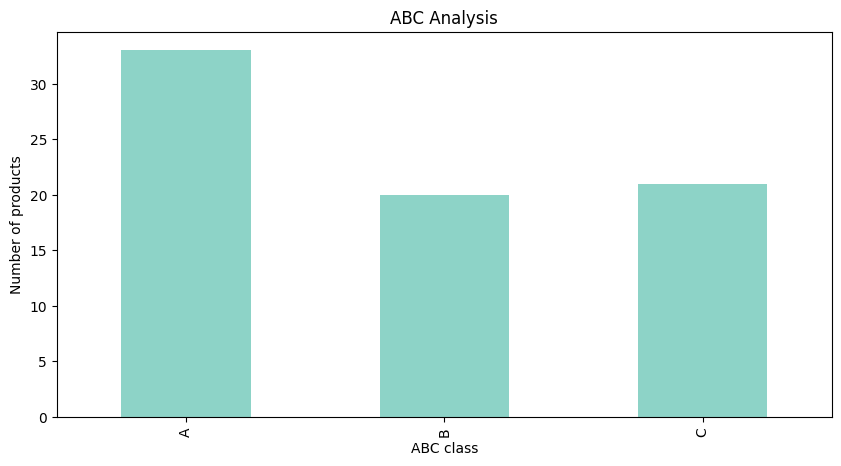

In [11]:
pivot['revenue_abc'].value_counts().sort_index().plot(kind='bar', colormap='Set3', figsize=(10, 5))
plt.title('ABC Analysis')
plt.xlabel('ABC class')
plt.ylabel('Number of products')

Зробимо ще один вимір АВС по кількості проданих товарів. 

Кроки ті самі лише колонка буде з кількістю продажів. 

In [12]:
quantity_pivot = sales.groupby('product_name').agg({'quantity': 'sum'}).sort_values('quantity', ascending=False)
quantity_pivot.head(10)

,quantity
product_name,
Konbu,645
Camembert Pierrot,540
Guaraná Fantástica,526
Raclette Courdavault,513
Rhönbräu Klosterbier,401
Uncle Bob's Organic Dried Pears,398
Lakkalikööri,386
Chai,359
Tarte au sucre,351


Одразу добавлю кількість до основної таблиці з виручкою. 

In [13]:
pivot = pivot.merge(quantity_pivot, on='product_name', how='left').sort_values('quantity', ascending=False)
pivot.head()

,revenue,percent,cumsum,revenue_abc,quantity
product_name,,,,,
Konbu,3870.00,0.88,83.28,B,645
Camembert Pierrot,18360.00,4.16,33.71,A,540
Guaraná Fantástica,2227.50,0.50,95.17,C,526
Raclette Courdavault,28215.00,6.39,29.55,A,513
Rhönbräu Klosterbier,3107.75,0.70,89.59,B,401


Тепер зробимо ABC-аналіз для кількості товару.

In [14]:
pivot['percent_quantity'] = round(pivot['quantity'] / pivot['quantity'].sum() * 100, 2).sort_values(ascending=False)
pivot['cumsum_quantity'] = pivot['percent_quantity'].cumsum()
pivot['abc_quantity'] = pd.cut(pivot['cumsum_quantity'], bins=[0, 80, 95, 101], labels=['A', 'B', 'C'])
pivot.head(10)


,revenue,percent,cumsum,revenue_abc,quantity,percent_quantity,cumsum_quantity,abc_quantity
product_name,,,,,,,,
Konbu,3870.00,0.88,83.28,B,645,4.21,4.21,A
Camembert Pierrot,18360.00,4.16,33.71,A,540,3.52,7.73,A
Guaraná Fantástica,2227.50,0.50,95.17,C,526,3.43,11.16,A
Raclette Courdavault,28215.00,6.39,29.55,A,513,3.35,14.51,A
Rhönbräu Klosterbier,3107.75,0.70,89.59,B,401,2.62,17.13,A
Uncle Bob's Organic Dried Pears,11940.00,2.71,40.34,A,398,2.60,19.73,A
Lakkalikööri,6948.00,1.57,54.28,A,386,2.52,22.25,A
Chai,5683.50,1.29,67.34,A,359,2.34,24.59,A
Sir Rodney's Scones,3510.00,0.80,86.55,B,351,2.29,26.88,A


Подивимось розподіл груп по кількості проданих товарів. 

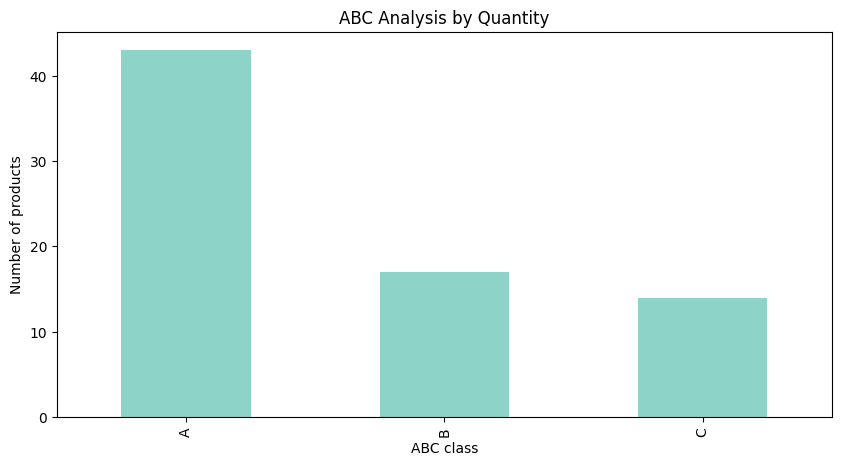

In [15]:
pivot['abc_quantity'].value_counts().sort_index().plot(kind='bar', colormap='Set3', figsize=(10, 5))
plt.title('ABC Analysis by Quantity')
plt.xlabel('ABC class')
plt.ylabel('Number of products')
plt.show()

Подивимось розподіл по кількості і виручці разом. 

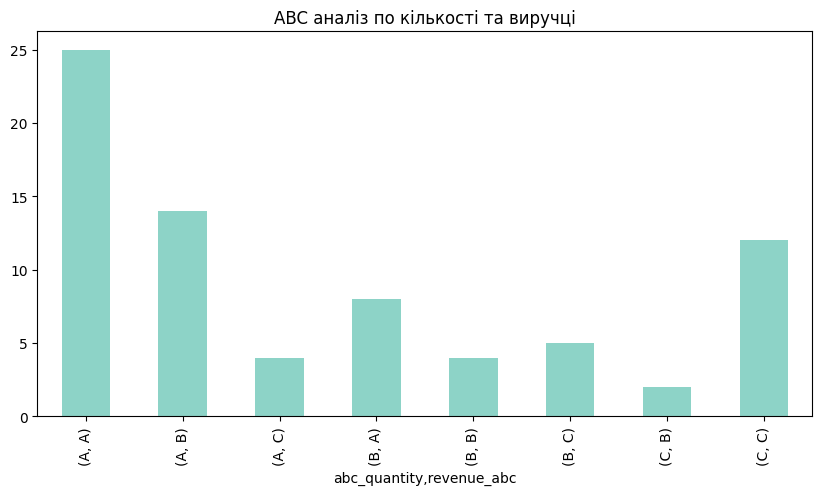

In [16]:
pivot[['abc_quantity', 'revenue_abc']].value_counts().sort_index()\
    .plot(kind='bar', colormap='Set3', figsize=(10, 5) )
plt.title('ABC аналіз по кількості та виручці');

Рекомендація: 
В першу чергу передивитись колонку (С,С) і прийняти рішення, або вивести з обороту товар (звільнити полку), або стимулювати продажі маркетинговими активностями.  
(А,В) і (А,С) - проаналізувати чи можемо ми підвищити ціну на дані товари.  
(В,А) скоріш за все якісь нішові дорогі товари, які продаються мало.  
Всі групи пробуємо перетягнути в групу вище. 

#### Функція для спрощення розрахунку ABC аналізу

In [17]:
def perform_abc(df, index): 
    """Функція для виконання ABC-аналізу.
    Подавати на вхід таблицю з назвою товару, кількістю продажів та виручкою.
    index - назва колонки, по якій групуємо дані.
    """
    cols = list(df.columns) # зберігаємо список з назвами колонок
    cols.remove(index) # видаляємо колонку, по якій групуємо дані
    grouped_df = df.groupby(index).agg({col: 'sum' for col in cols})  # групуємо дані по колонці index, підсумовуємо інші колонки 
    for col in cols: # для кожної колонки виконуємо:
        grouped_df[col + '_percent'] = round(grouped_df[col] / grouped_df[col].sum() * 100, 2)  # обчислюємо відсоток
        grouped_df = grouped_df.sort_values(col + '_percent', ascending=False)  # сортуємо за відсотком
        grouped_df[col + '_cumsum'] = grouped_df[col + '_percent'].cumsum() # обчислюємо кумулятивну суму
        grouped_df[col + '_abc'] = pd.cut(grouped_df[col + '_cumsum'], bins=[0, 80, 95, 101], labels=['A', 'B', 'C']) # обчислюємо ABC-класи
    return grouped_df[cols + [col + '_abc' for col in cols]] # повертаємо таблицю з колонками, які були на вході, та новими колонками з ABC-класами


#### Приклад роботи функції:

In [18]:
sales.head()

,order_date,order_id,product_id,unit_price,discount,quantity,product_name,supplier_id,category_id,discontinued,revenue
0,1998-01-01,10808,56,38.0,0.15,20,Gnocchi di nonna Alice,26,5,0,760.0
1,1998-01-01,10808,76,18.0,0.15,50,Lakkalikööri,23,1,0,900.0
2,1998-01-01,10809,52,7.0,0.00,20,Filo Mix,24,5,0,140.0
3,1998-01-01,10810,13,6.0,0.00,7,Konbu,6,8,0,42.0
4,1998-01-01,10810,25,14.0,0.00,5,NuNuCa Nuß-Nougat-Creme,11,3,0,70.0


In [19]:
abc = perform_abc(sales[['product_name', 'quantity', 'revenue']], 'product_name')

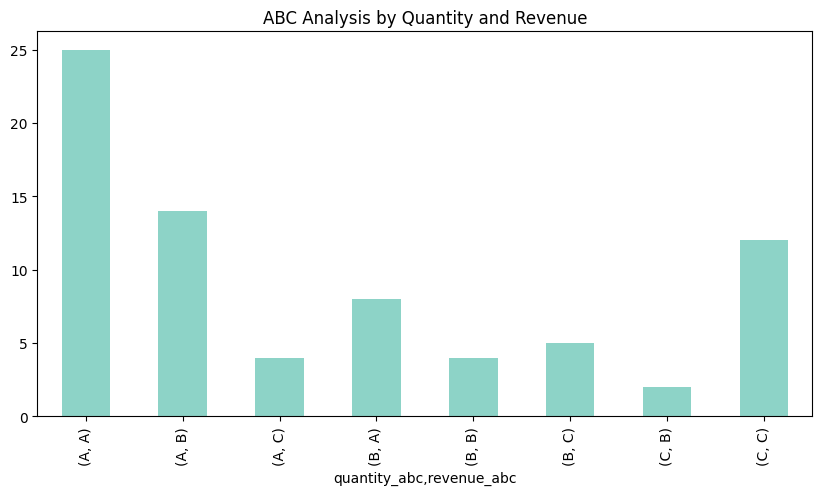

In [20]:
abc[['quantity_abc', 'revenue_abc']].value_counts().sort_index()\
    .plot(kind='bar', colormap='Set3', figsize=(10, 5))
plt.title('ABC Analysis by Quantity and Revenue');

### Динаміка продажів

[х] Оцінити структуру  
[х] порахувати суму продажів за кожен день(місяц, квартал)  
[х] порахувати динаміку   

In [21]:
sales.head()

,order_date,order_id,product_id,unit_price,discount,quantity,product_name,supplier_id,category_id,discontinued,revenue
0,1998-01-01,10808,56,38.0,0.15,20,Gnocchi di nonna Alice,26,5,0,760.0
1,1998-01-01,10808,76,18.0,0.15,50,Lakkalikööri,23,1,0,900.0
2,1998-01-01,10809,52,7.0,0.00,20,Filo Mix,24,5,0,140.0
3,1998-01-01,10810,13,6.0,0.00,7,Konbu,6,8,0,42.0
4,1998-01-01,10810,25,14.0,0.00,5,NuNuCa Nuß-Nougat-Creme,11,3,0,70.0


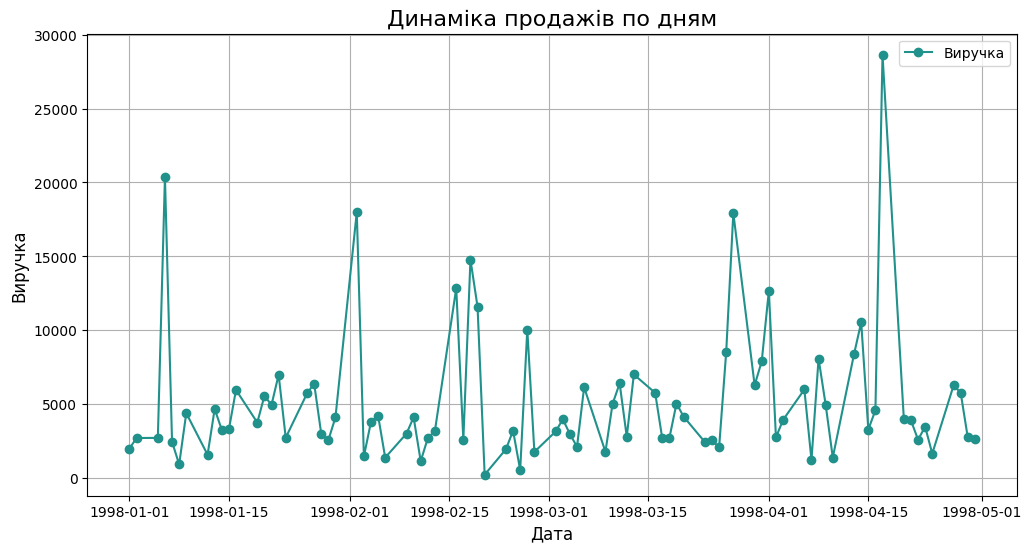

In [23]:

daily_sales = sales.groupby('order_date').agg({'revenue': 'sum'}).reset_index()


plt.figure(figsize=(12, 6))
plt.plot(daily_sales['order_date'], daily_sales['revenue'], marker='o', label='Виручка', color=plt.get_cmap('viridis')(0.5))
plt.title('Динаміка продажів по дням', fontsize=16)
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Виручка', fontsize=12)
plt.grid(True)
plt.legend()
plt.show()

Видно, що є дні в які нам непогано пощастило заробити. Я б подивився за рахунок чого. 

In [24]:
sales[sales['order_date'].isin(daily_sales[daily_sales['revenue'] > 15000]['order_date'])].head()

,order_date,order_id,product_id,unit_price,discount,quantity,product_name,supplier_id,category_id,discontinued,revenue
19,1998-01-06,10816,38,263.50,0.05,30,Côte de Blaye,18,1,0,7905.0
20,1998-01-06,10816,62,49.30,0.05,20,Tarte au sucre,29,3,0,986.0
21,1998-01-06,10817,26,31.23,0.15,40,Gumbär Gummibärchen,11,3,0,1249.2
22,1998-01-06,10817,38,263.50,0.00,30,Côte de Blaye,18,1,0,7905.0
23,1998-01-06,10817,40,18.40,0.15,60,Boston Crab Meat,19,8,0,1104.0


Ми маємо дані за чотири місяці. Промоную додати додаткові колонки такі як місяць та тиждень. І потім будемо відстежувати динаміку по дню, тижню та місяцю. 

In [25]:
sales['week'] = sales['order_date'].dt.isocalendar().week

In [26]:
sales['month'] = sales['order_date'].dt.month

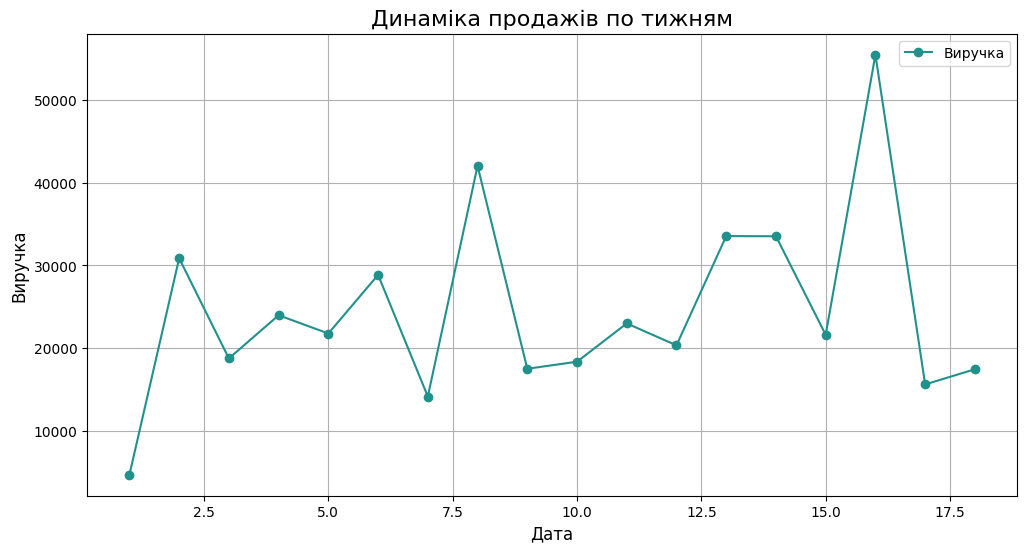

In [27]:

weekly_sales = sales.groupby('week').agg({'revenue': 'sum'}).reset_index()


plt.figure(figsize=(12, 6))
plt.plot(weekly_sales['week'], weekly_sales['revenue'], marker='o', label='Виручка', color=plt.get_cmap('viridis')(0.5))
plt.title('Динаміка продажів по тижням', fontsize=16)
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Виручка', fontsize=12)
plt.grid(True)
plt.legend()
plt.show()

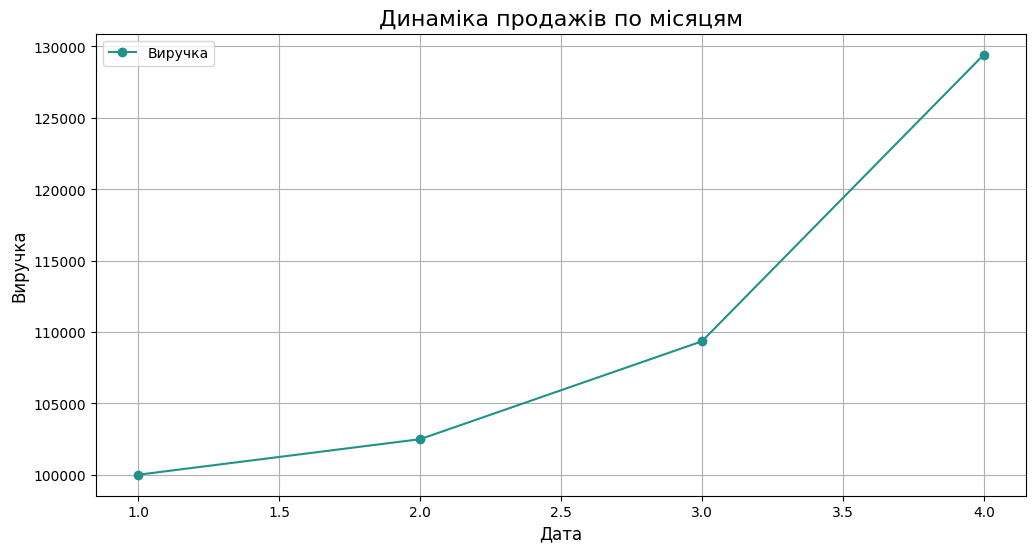

In [28]:
monthly_sales = sales.groupby('month').agg({'revenue': 'sum'}).reset_index()


plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['month'], monthly_sales['revenue'], marker='o', label='Виручка', color=plt.get_cmap('viridis')(0.5))
plt.title('Динаміка продажів по місяцям', fontsize=16)
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Виручка', fontsize=12)
plt.grid(True)
plt.legend()
plt.show()

Поглянемо на динаміку продажів стосовно попереднього місяця у відсотках. 

In [29]:
round(monthly_sales['revenue'].pct_change()*100, 2)

0      NaN
1     2.49
2     6.69
3    18.36
Name: revenue, dtype: float64

В квітні приросли достатньо сильно аж на 18%.  
Але не треба забувати, що у нас в квітні був один день де ми продали більше ніж на 25000. Його треба буде розібрати більш детально. 

### XYZ - аналіз 

[x] Рахуємо продажі по дням з розбивкою по товарах  
[x] Рахуємо коефіціент варіації  
[x] Оприділяємо групу 

In [30]:
sales.head()

,order_date,order_id,product_id,unit_price,discount,quantity,product_name,supplier_id,category_id,discontinued,revenue,week,month
0,1998-01-01,10808,56,38.0,0.15,20,Gnocchi di nonna Alice,26,5,0,760.0,1,1
1,1998-01-01,10808,76,18.0,0.15,50,Lakkalikööri,23,1,0,900.0,1,1
2,1998-01-01,10809,52,7.0,0.00,20,Filo Mix,24,5,0,140.0,1,1
3,1998-01-01,10810,13,6.0,0.00,7,Konbu,6,8,0,42.0,1,1
4,1998-01-01,10810,25,14.0,0.00,5,NuNuCa Nuß-Nougat-Creme,11,3,0,70.0,1,1


Спочатку дізнаємось скільки кожного товару продаеться по місяцям.

In [31]:
df = sales.groupby([ 'month','product_name']).agg({'quantity': 'sum'}).reset_index()
df.head()

,month,product_name,quantity
0,1,Alice Mutton,48
1,1,Aniseed Syrup,79
2,1,Boston Crab Meat,115
3,1,Camembert Pierrot,156
4,1,Carnarvon Tigers,55


Знайдемо коваріацію по полю quantity

In [32]:
df = df.groupby('product_name').apply(lambda x: x.std()/x.mean())['quantity'].reset_index()
df.rename(columns={'quantity':'cov' }, inplace=True)
df

,product_name,cov
0,Alice Mutton,0.543609
1,Aniseed Syrup,0.734303
2,Boston Crab Meat,0.528424
3,Camembert Pierrot,0.264047
4,Carnarvon Tigers,0.503253
...,...,...
69,Uncle Bob's Organic Dried Pears,0.908478
70,Valkoinen suklaa,NaN
71,Vegie-spread,0.606092
72,Wimmers gute Semmelknödel,0.836975


Присвоїмо кожному товару групу в залежності від величини коваріації.  
Чим більша коваріація тим менше прогнозовані продажі товару.  
Візьмемо стандартні пороги X < 10%, Y < 25%, Z - всі інші. 

In [33]:
df['xyz']  = np.where(df['cov'] < 0.1, 'X', np.where(df['cov'] < 0.25, 'Y', 'Z'))


Об'єднаємо XYZ і АВС.  
Подивимось розподіл товарів по прогнозованості продажів. 

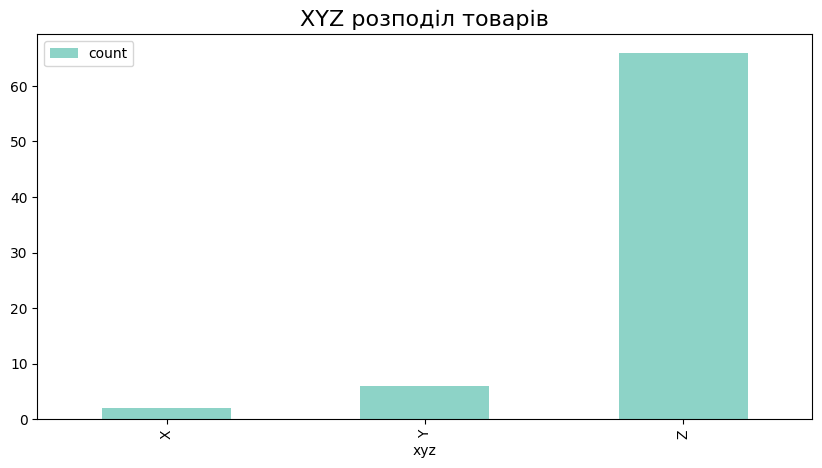

In [34]:
final = df.merge(abc, on='product_name', how='left')
final['xyz'].value_counts().sort_index().plot(kind='bar', colormap='Set3', figsize=(10, 5))


plt.title('XYZ розподіл товарів', fontsize=16)
plt.legend()
plt.show()

In [35]:
final['xyz'].value_counts().sort_index()

xyz
X     2
Y     6
Z    66
Name: count, dtype: int64

Всього 2 товара в корзині зі стабільним попитом. Це не дуже добре.  
Давайте подивимось на об'єднані групи. 

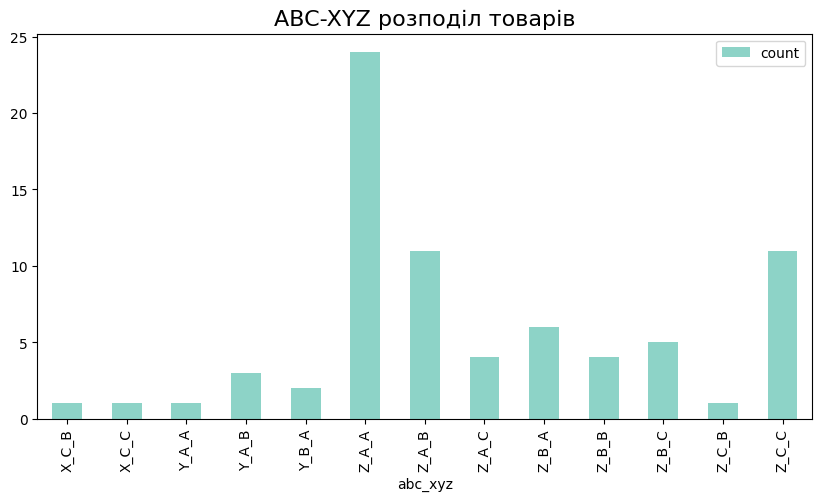

In [36]:
final['abc_xyz'] = final['xyz'].astype(str) + '_' + final['quantity_abc'].astype(str) + '_' + final['revenue_abc'].astype(str)
final['abc_xyz'].value_counts().sort_index().plot(kind='bar', colormap='Set3', figsize=(10, 5))

plt.title('ABC-XYZ розподіл товарів', fontsize=16)
plt.legend()
plt.show()


Тепер ситуація ще гірше виглядає. Так, як наші стабільні групи стабільно не продаються.  

 

## Рекомендація:
Не закупати велику кількість товару на склад.  
А ще краще купувати у постачальника після передплати клієнтом.